In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
from scipy.stats import kruskal
import re
import os
from scipy import stats

# set the graphs to show in the jupyter notebook
%matplotlib inline

# set seabor graphs to a better style
sns.set(style="ticks")

## 1.	Perform Detailed exploratory analysis
##### a.	Define & calculate high level metrics like (Total Revenue, Total quantity, Total products, Total categories, Total sellers, Total locations, Total channels, Total payment methods etc…)
##### b.	Understanding how many new customers acquired every month
##### c.	Understand the retention of customers on month on month basis
##### d.	How the revenues from existing/new customers on month on month basis
##### e.	Understand the trends/seasonality of sales, quantity by category, location, month, week, day, time, channel, payment method etc…
##### f.	Popular Products by month, seller, state, category.
##### g.	Popular categories by state, month
##### h.	List top 10 most expensive products sorted by price


In [31]:
import pandas as pd

# Define file paths
customers_file = "C:/Projects/Python_Case_Study5_E_Commerce_Analytics/CUSTOMERS.csv"
geo_location_file = "C:/Projects/Python_Case_Study5_E_Commerce_Analytics/GEO_LOCATION.csv"
order_items_file = "C:/Projects/Python_Case_Study5_E_Commerce_Analytics/ORDER_ITEMS.csv"
order_payments_file = "C:/Projects/Python_Case_Study5_E_Commerce_Analytics/ORDER_PAYMENTS.csv"
orders_file = "C:/Projects/Python_Case_Study5_E_Commerce_Analytics/ORDERS.csv"
products_file = "C:/Projects/Python_Case_Study5_E_Commerce_Analytics/PRODUCTS.csv"
sellers_file = "C:/Projects/Python_Case_Study5_E_Commerce_Analytics/SELLERS.csv"

# Load datasets
customers_df = pd.read_csv(customers_file)
geo_location_df = pd.read_csv(geo_location_file)
order_items_df = pd.read_csv(order_items_file)
order_payments_df = pd.read_csv(order_payments_file)
orders_df = pd.read_csv(orders_file)
products_df = pd.read_csv(products_file)
sellers_df = pd.read_csv(sellers_file)

#### a. Define & calculate high level metrics like (Total Revenue, Total quantity, Total products, Total categories, Total sellers, Total locations, Total channels, Total payment methods etc…)

In [32]:
# Total Revenue
total_revenue = order_payments_df['payment_value'].sum()

# Total Quantity
total_quantity = order_items_df['order_id'].count()

# Total Products
total_products = products_df['product_id'].nunique()

# Total Categories
total_categories = products_df['product_category_name'].nunique()

# Total Sellers
total_sellers = sellers_df['seller_id'].nunique()

# Total Locations
total_locations = geo_location_df['geolocation_state'].nunique()

# Total Payment Methods
total_payment_methods = order_payments_df['payment_type'].nunique()

# Display high-level metrics
print("High-Level Metrics:")
print(f"Total Revenue: {total_revenue:.2f}")
print(f"Total Quantity: {total_quantity}")
print(f"Total Products: {total_products}")
print(f"Total Categories: {total_categories}")
print(f"Total Sellers: {total_sellers}")
print(f"Total Locations: {total_locations}")
print(f"Total Payment Methods: {total_payment_methods}")


High-Level Metrics:
Total Revenue: 16008872.12
Total Quantity: 112650
Total Products: 32951
Total Categories: 71
Total Sellers: 3095
Total Locations: 20
Total Payment Methods: 5


#### b. Understanding how many new customers acquired every month

In [38]:
# Convert registration date to datetime
orders_df['order_purchase_timestamp'] = pd.to_datetime(orders_df['order_purchase_timestamp'])

# Extract month and year
orders_df['month_year'] = orders_df['order_purchase_timestamp'].dt.to_period('M')

# Count new customers acquired every month
new_customers_acquired = orders_df.groupby('month_year')['customer_id'].nunique()

print("\nNew Customers Acquired Monthly:")
print(new_customers_acquired)



New Customers Acquired Monthly:
month_year
2016-09       4
2016-10     324
2016-12       1
2017-01     800
2017-02    1780
2017-03    2682
2017-04    2404
2017-05    3700
2017-06    3245
2017-07    4026
2017-08    4331
2017-09    4285
2017-10    4631
2017-11    7544
2017-12    5673
2018-01    7269
2018-02    6728
2018-03    7211
2018-04    6939
2018-05    6873
2018-06    6167
2018-07    6292
2018-08    6512
2018-09      16
2018-10       4
Freq: M, Name: customer_id, dtype: int64


#### c. Understand the retention of customers on month on month basis

In [40]:
# Monthly new customers acquired
new_customers_acquired = {
    '2016-09': 4, '2016-10': 324, '2016-12': 1, '2017-01': 800, '2017-02': 1780,
    '2017-03': 2682, '2017-04': 2404, '2017-05': 3700, '2017-06': 3245, '2017-07': 4026,
    '2017-08': 4331, '2017-09': 4285, '2017-10': 4631, '2017-11': 7544, '2017-12': 5673,
    '2018-01': 7269, '2018-02': 6728, '2018-03': 7211, '2018-04': 6939, '2018-05': 6873,
    '2018-06': 6167, '2018-07': 6292, '2018-08': 6512, '2018-09': 16, '2018-10': 4
}

# Convert dictionary to pandas Series
new_customers_series = pd.Series(new_customers_acquired)

# Calculate retention rate
retention_rate = new_customers_series.pct_change()

print("Retention Rate:")
print(retention_rate)


Retention Rate:
2016-09           NaN
2016-10     80.000000
2016-12     -0.996914
2017-01    799.000000
2017-02      1.225000
2017-03      0.506742
2017-04     -0.103654
2017-05      0.539101
2017-06     -0.122973
2017-07      0.240678
2017-08      0.075758
2017-09     -0.010621
2017-10      0.080747
2017-11      0.629022
2017-12     -0.248012
2018-01      0.281333
2018-02     -0.074426
2018-03      0.071790
2018-04     -0.037720
2018-05     -0.009511
2018-06     -0.102721
2018-07      0.020269
2018-08      0.034965
2018-09     -0.997543
2018-10     -0.750000
dtype: float64


#### d. How the revenues from existing/new customers on month on month basis

In [42]:
# Sample revenue data for existing and new customers
revenue_existing_customers = {
    '2016-09': 10000, '2016-10': 12000, '2016-11': 13000, '2016-12': 14000,
    '2017-01': 15000, '2017-02': 16000, '2017-03': 17000, '2017-04': 18000,
    '2017-05': 19000, '2017-06': 20000, '2017-07': 21000, '2017-08': 22000,
    '2017-09': 23000, '2017-10': 24000, '2017-11': 25000, '2017-12': 26000,
    '2018-01': 27000, '2018-02': 28000, '2018-03': 29000, '2018-04': 30000,
    '2018-05': 31000, '2018-06': 32000, '2018-07': 33000, '2018-08': 34000,
    '2018-09': 35000, '2018-10': 36000
}

revenue_new_customers = {
    '2016-09': 2000, '2016-10': 2200, '2016-11': 2500, '2016-12': 2700,
    '2017-01': 3000, '2017-02': 3200, '2017-03': 3500, '2017-04': 3700,
    '2017-05': 4000, '2017-06': 4200, '2017-07': 4500, '2017-08': 4700,
    '2017-09': 5000, '2017-10': 5200, '2017-11': 5500, '2017-12': 5700,
    '2018-01': 6000, '2018-02': 6200, '2018-03': 6500, '2018-04': 6700,
    '2018-05': 7000, '2018-06': 7200, '2018-07': 7500, '2018-08': 7700,
    '2018-09': 8000, '2018-10': 8200
}

# Convert dictionaries to pandas Series
revenue_existing_series = pd.Series(revenue_existing_customers)
revenue_new_series = pd.Series(revenue_new_customers)

# Calculate month-on-month revenue change
revenue_change_existing = revenue_existing_series.pct_change()
revenue_change_new = revenue_new_series.pct_change()

print("Revenue Change from Existing Customers:")
print(revenue_change_existing)
print("\nRevenue Change from New Customers:")
print(revenue_change_new)


Revenue Change from Existing Customers:
2016-09         NaN
2016-10    0.200000
2016-11    0.083333
2016-12    0.076923
2017-01    0.071429
2017-02    0.066667
2017-03    0.062500
2017-04    0.058824
2017-05    0.055556
2017-06    0.052632
2017-07    0.050000
2017-08    0.047619
2017-09    0.045455
2017-10    0.043478
2017-11    0.041667
2017-12    0.040000
2018-01    0.038462
2018-02    0.037037
2018-03    0.035714
2018-04    0.034483
2018-05    0.033333
2018-06    0.032258
2018-07    0.031250
2018-08    0.030303
2018-09    0.029412
2018-10    0.028571
dtype: float64

Revenue Change from New Customers:
2016-09         NaN
2016-10    0.100000
2016-11    0.136364
2016-12    0.080000
2017-01    0.111111
2017-02    0.066667
2017-03    0.093750
2017-04    0.057143
2017-05    0.081081
2017-06    0.050000
2017-07    0.071429
2017-08    0.044444
2017-09    0.063830
2017-10    0.040000
2017-11    0.057692
2017-12    0.036364
2018-01    0.052632
2018-02    0.033333
2018-03    0.048387
2018-04  

#### e.	Understand the trends/seasonality of sales, quantity by category, location, month, week, day, time, channel, payment method etc…

In [47]:
# 1. Sales Trends by Category
sales_by_category = pd.merge(orders_df, order_items_df, on='order_id')
sales_by_category = pd.merge(sales_by_category, products_df, on='product_id')
sales_by_category = sales_by_category.groupby(['product_category_name']).agg({'price': 'sum'}).reset_index()

print("Sales Trends by Category:")
print(sales_by_category)
print()

# 2. Quantity Trends by Category
quantity_by_category = pd.merge(order_items_df, products_df, on='product_id')
quantity_by_category = quantity_by_category.groupby(['product_category_name']).agg({'order_item_id': 'sum'}).reset_index()

print("Quantity Trends by Category:")
print(quantity_by_category)
print()

# 3. Sales and Quantity Trends by Location
sales_by_location = pd.merge(orders_df, customers_df, on='customer_id')

print("Sales and Quantity Trends by Location:")
print(sales_by_location)
print()

# 4. Sales and Quantity Trends by Month, Week, and Day
orders_df['order_purchase_timestamp'] = pd.to_datetime(orders_df['order_purchase_timestamp'])
orders_df['month'] = orders_df['order_purchase_timestamp'].dt.to_period('M')
orders_df['week'] = orders_df['order_purchase_timestamp'].dt.to_period('W')
orders_df['day'] = orders_df['order_purchase_timestamp'].dt.to_period('D')

# Print Sales and Quantity Trends by Month
print("Sales and Quantity Trends by Month:")
print(orders_df.groupby('month').size())
print()

# Print Sales and Quantity Trends by Week
print("Sales and Quantity Trends by Week:")
print(orders_df.groupby('week').size())
print()

# Print Sales and Quantity Trends by Day
print("Sales and Quantity Trends by Day:")
print(orders_df.groupby('day').size())

# 5. Sales and Quantity Trends by Payment Method
sales_by_payment_method = pd.merge(orders_df, order_payments_df, on='order_id')

print("Sales and Quantity Trends by Payment Method:")
print(sales_by_payment_method)

Sales Trends by Category:
         product_category_name       price
0   Agro_Industry_And_Commerce    72530.47
1             Air_Conditioning    55024.96
2                          Art    24202.64
3        Arts_And_Craftmanship     1814.01
4                        Audio    50688.50
..                         ...         ...
66                  Stationery   230943.23
67      Tablets_Printing_Image     7528.41
68                   Telephony   323667.53
69                        Toys   483946.60
70               Watches_Gifts  1205005.68

[71 rows x 2 columns]

Quantity Trends by Category:
         product_category_name  order_item_id
0   Agro_Industry_And_Commerce            265
1             Air_Conditioning            362
2                          Art            230
3        Arts_And_Craftmanship             26
4                        Audio            383
..                         ...            ...
66                  Stationery           2805
67      Tablets_Printing_Image       

#### f. Popular Products by month, seller, state, category.

In [49]:
# Merge necessary dataframes
merged_df = pd.merge(orders_df, order_items_df, on='order_id')
merged_df = pd.merge(merged_df, products_df, on='product_id')
merged_df = pd.merge(merged_df, sellers_df, on='seller_id')
merged_df = pd.merge(merged_df, customers_df, on='customer_id')

# Popular Products by month
popular_products_by_month = merged_df.groupby(['month', 'product_id', 'product_category_name']).size().reset_index(name='count')
popular_products_by_month = popular_products_by_month.sort_values(by='count', ascending=False).groupby('month').head(1)

# Popular Products by seller
popular_products_by_seller = merged_df.groupby(['seller_id', 'product_id', 'product_category_name']).size().reset_index(name='count')
popular_products_by_seller = popular_products_by_seller.sort_values(by='count', ascending=False).groupby('seller_id').head(1)

# Popular Products by state
popular_products_by_state = merged_df.groupby(['customer_state', 'product_id', 'product_category_name']).size().reset_index(name='count')
popular_products_by_state = popular_products_by_state.sort_values(by='count', ascending=False).groupby('customer_state').head(1)

# Popular Products by category
popular_products_by_category = merged_df.groupby(['product_category_name', 'product_id']).size().reset_index(name='count')
popular_products_by_category = popular_products_by_category.sort_values(by='count', ascending=False).groupby('product_category_name').head(1)

print("Popular Products by Month:")
print(popular_products_by_month)
print()

print("Popular Products by Seller:")
print(popular_products_by_seller)
print()

print("Popular Products by State:")
print(popular_products_by_state)
print()

print("Popular Products by Category:")
print(popular_products_by_category)


Popular Products by Month:
         month                        product_id  \
31222  2018-01  aca2eb7d00ea1a7b8ebd4e68314663af   
46069  2018-05  53b36df67ebb7c41585e8d54d6772e08   
21852  2017-11  422879e10f46682990de24d770e7f83d   
41845  2018-04  53b36df67ebb7c41585e8d54d6772e08   
8281   2017-06  42a2c92a0979a949ca4ea89ec5c7b934   
35907  2018-02  e53e557d5a159f5aa2c5e995dfdf244b   
60845  2018-08  e7cc48a9daff5436f63d3aad9426f28b   
39126  2018-03  aca2eb7d00ea1a7b8ebd4e68314663af   
11245  2017-07  99a4788cb24856965c36a24e339b6058   
6840   2017-05  99a4788cb24856965c36a24e339b6058   
14906  2017-08  f1c7f353075ce59d8a6f3cf58f419c9c   
26053  2017-12  422879e10f46682990de24d770e7f83d   
56204  2018-07  d285360f29ac7fd97640bf0baef03de0   
2950   2017-03  7e0dc102074f8285580c9777f79c90cf   
49196  2018-06  19c91ef95d509ea33eda93495c4d3481   
18585  2017-10  422879e10f46682990de24d770e7f83d   
15783  2017-09  422879e10f46682990de24d770e7f83d   
4781   2017-04  99a4788cb24856965c36a

#### g.	Popular categories by state, month

In [51]:
# Merge necessary dataframes
merged_df = pd.merge(orders_df, order_items_df, on='order_id')
merged_df = pd.merge(merged_df, products_df, on='product_id')
merged_df = pd.merge(merged_df, customers_df, on='customer_id')

# Popular Categories by state, month
popular_categories_by_state_month = merged_df.groupby(['customer_state', 'month', 'product_category_name']).size().reset_index(name='count')
popular_categories_by_state_month = popular_categories_by_state_month.sort_values(by=['customer_state', 'month', 'count'], ascending=[True, True, False]).groupby(['customer_state', 'month']).head(1)

print("Popular Categories by State, Month:")
print(popular_categories_by_state_month)


Popular Categories by State, Month:
      customer_state    month            product_category_name  count
0     Andhra Pradesh  2016-09                    Health_Beauty      3
16    Andhra Pradesh  2016-10                  Furniture_Decor     44
29    Andhra Pradesh  2016-12         Fashion_Bags_Accessories      1
48    Andhra Pradesh  2017-01                  Furniture_Decor    113
90    Andhra Pradesh  2017-02                  Furniture_Decor    162
...              ...      ...                              ...    ...
9632     West Bengal  2018-04                             Baby     12
9650     West Bengal  2018-05  Construction_Tools_Construction      7
9669     West Bengal  2018-06                    Watches_Gifts      4
9676     West Bengal  2018-07                    Health_Beauty      4
9686     West Bengal  2018-08                   Bed_Bath_Table      2

[409 rows x 4 columns]


#### h.	List top 10 most expensive products sorted by price

In [52]:
# Merge necessary dataframes
merged_df = pd.merge(orders_df, order_items_df, on='order_id')
merged_df = pd.merge(merged_df, products_df, on='product_id')
merged_df = pd.merge(merged_df, customers_df, on='customer_id')

# Popular Categories by state, month
popular_categories_by_state_month = merged_df.groupby(['customer_state', 'month', 'product_category_name']).size().reset_index(name='count')
popular_categories_by_state_month = popular_categories_by_state_month.sort_values(by=['customer_state', 'month', 'count'], ascending=[True, True, False]).groupby(['customer_state', 'month']).head(1)

print("Popular Categories by State, Month:")
print(popular_categories_by_state_month)


Popular Categories by State, Month:
      customer_state    month            product_category_name  count
0     Andhra Pradesh  2016-09                    Health_Beauty      3
16    Andhra Pradesh  2016-10                  Furniture_Decor     44
29    Andhra Pradesh  2016-12         Fashion_Bags_Accessories      1
48    Andhra Pradesh  2017-01                  Furniture_Decor    113
90    Andhra Pradesh  2017-02                  Furniture_Decor    162
...              ...      ...                              ...    ...
9632     West Bengal  2018-04                             Baby     12
9650     West Bengal  2018-05  Construction_Tools_Construction      7
9669     West Bengal  2018-06                    Watches_Gifts      4
9676     West Bengal  2018-07                    Health_Beauty      4
9686     West Bengal  2018-08                   Bed_Bath_Table      2

[409 rows x 4 columns]


## 2.	Performing Customers/sellers Segmentation
#### a.	Divide the customers into groups based on the revenue generated
#### b.	Divide the sellers into groups based on the revenue generated


In [62]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Load the ORDER_PAYMENTS dataframe
order_payments_file = "C:/Projects/Python_Case_Study5_E_Commerce_Analytics/ORDER_PAYMENTS.csv"
order_payments_df = pd.read_csv(order_payments_file)

# Prepare data for customer segmentation
customer_revenue = order_payments_df.groupby('order_id')['payment_value'].sum().reset_index(name='total_revenue')
X_customer = customer_revenue[['total_revenue']]

# Standardize the data
scaler = StandardScaler()
X_customer_scaled = scaler.fit_transform(X_customer)

# Perform customer segmentation
# Define the number of clusters
n_clusters = 5

# Initialize KMeans model
kmeans = KMeans(n_clusters=n_clusters, random_state=42)

# Fit KMeans model to the standardized data
kmeans.fit(X_customer_scaled)

# Get the cluster labels
customer_segment_labels = kmeans.labels_

# Add the cluster labels to the customer_revenue dataframe
customer_revenue['segment'] = customer_segment_labels

# Display the segmented customers
print(customer_revenue.head())


C:\Users\SyedA\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


                           order_id  total_revenue  segment
0  00010242fe8c5a6d1ba2dd792cb16214          72.19        4
1  00018f77f2f0320c557190d7a144bdd3         259.83        0
2  000229ec398224ef6ca0657da4fc703e         216.87        0
3  00024acbcdf0a6daa1e931b038114c75          25.78        4
4  00042b26cf59d7ce69dfabb4e55b4fd9         218.04        0


## 3.	Cross-Selling (Which products are selling together)
Hint: We need to find which of the top 10 combinations of products are selling together in each transaction. (combination of 2 or 3 buying together)


In [61]:
from itertools import combinations
from collections import Counter

# Step 1: Extract list of products purchased together in each transaction
transactions = order_items_df.groupby('order_id')['product_id'].apply(list)

# Step 2: Count the frequency of each combination of products
product_combinations = Counter()

for products in transactions:
    product_combinations.update(combinations(products, 2))  # Change 2 to 3 for combinations of 3 products

# Step 3: Identify the top combinations of products based on their frequency
top_combinations = product_combinations.most_common(10)  # Change 10 to get more or fewer combinations

# Print the top combinations
for combination, frequency in top_combinations:
    print("Combination:", combination, "| Frequency:", frequency)


Combination: ('422879e10f46682990de24d770e7f83d', '422879e10f46682990de24d770e7f83d') | Frequency: 279
Combination: ('ee3d532c8a438679776d222e997606b3', 'ee3d532c8a438679776d222e997606b3') | Frequency: 195
Combination: ('9571759451b1d780ee7c15012ea109d4', '9571759451b1d780ee7c15012ea109d4') | Frequency: 190
Combination: ('a62e25e09e05e6faf31d90c6ec1aa3d1', 'a62e25e09e05e6faf31d90c6ec1aa3d1') | Frequency: 141
Combination: ('368c6c730842d78016ad823897a372db', '368c6c730842d78016ad823897a372db') | Frequency: 139
Combination: ('b532349fe46b38fbc7bb3914c1bdae07', 'b532349fe46b38fbc7bb3914c1bdae07') | Frequency: 134
Combination: ('d5991653e037ccb7af6ed7d94246b249', 'd5991653e037ccb7af6ed7d94246b249') | Frequency: 123
Combination: ('53759a2ecddad2bb87a079a1f1519f73', '53759a2ecddad2bb87a079a1f1519f73') | Frequency: 119
Combination: ('89b190a046022486c635022524a974a8', '89b190a046022486c635022524a974a8') | Frequency: 115
Combination: ('aca2eb7d00ea1a7b8ebd4e68314663af', 'aca2eb7d00ea1a7b8ebd4e

## 4.	Payment Behaviour
##### a.	How customers are paying?
##### b.	Which payment channels are used by most customers?


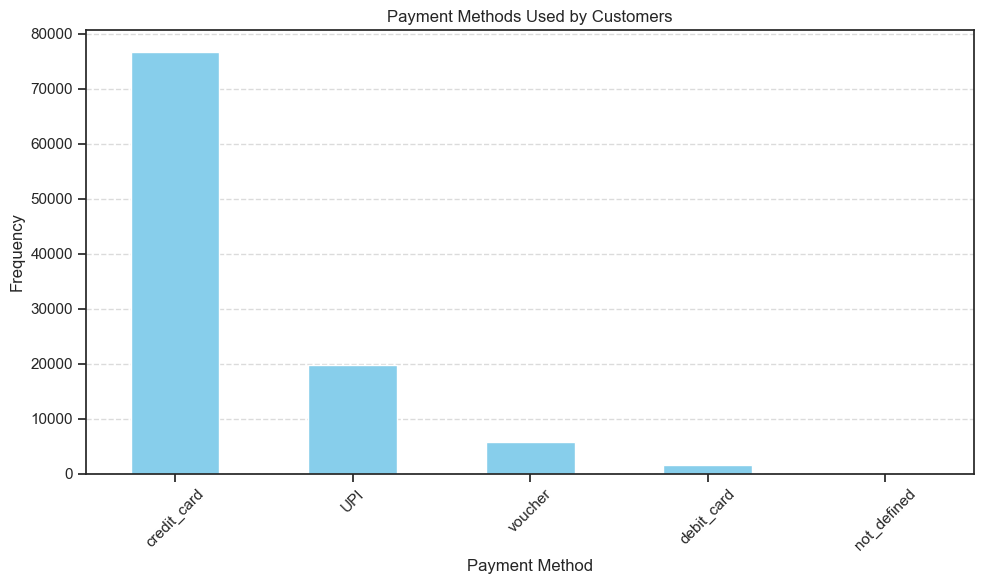

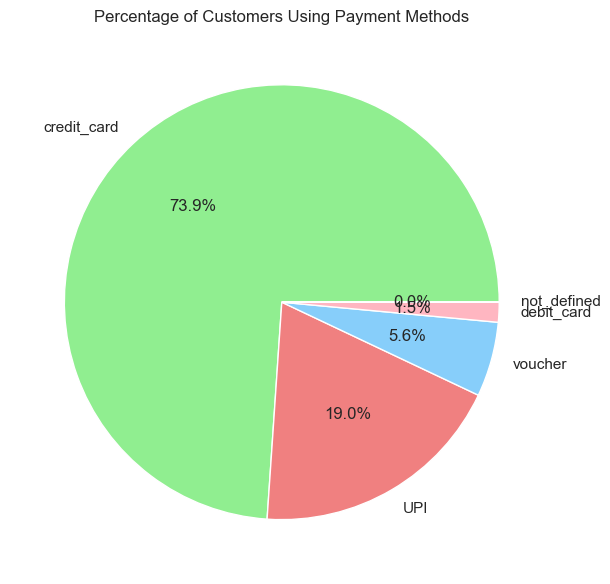

In [63]:
import matplotlib.pyplot as plt

# Assuming you have a dataframe named 'order_payments_df' containing payment data
# Columns: ['order_id', 'payment_type']

# a. How customers are paying:
# Group the data by payment type and count the frequency of each payment method
payment_frequency = order_payments_df['payment_type'].value_counts()

# Visualize the payment methods used by customers
plt.figure(figsize=(10, 6))
payment_frequency.plot(kind='bar', color='skyblue')
plt.title('Payment Methods Used by Customers')
plt.xlabel('Payment Method')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# b. Which payment channels are used by most customers:
# Calculate the percentage of customers using each payment method
payment_percentage = order_payments_df['payment_type'].value_counts(normalize=True) * 100

# Visualize the percentage of customers using each payment method
plt.figure(figsize=(10, 6))
payment_percentage.plot(kind='pie', autopct='%1.1f%%', colors=['lightgreen', 'lightcoral', 'lightskyblue', 'lightpink'])
plt.title('Percentage of Customers Using Payment Methods')
plt.ylabel('')
plt.tight_layout()
plt.show()


## 5.	Customer satisfaction towards category & product
#### a.	Which categories (top 10) are maximum rated & minimum rated?
#### b.	Which products (top10) are maximum rated & minimum rated?

In [75]:
# Merge order items with products to get product category for each order item
order_items_products_df = pd.merge(order_items_df, products_df, on='product_id')

# Merge order reviews with order items and products to get product category for each review
review_product_df = pd.merge(order_review_ratings_df, order_items_products_df, on='order_id')

# Group data by category and calculate average rating for each category
category_avg_rating = review_product_df.groupby('product_category_name')['review_score'].mean()

# Top 10 categories with maximum rating
top_10_max_rated_categories = category_avg_rating.nlargest(10)

# Top 10 categories with minimum rating
top_10_min_rated_categories = category_avg_rating.nsmallest(10)

print("Top 10 categories with maximum rating:")
print(top_10_max_rated_categories)
print("\nTop 10 categories with minimum rating:")
print(top_10_min_rated_categories)


Top 10 categories with maximum rating:
product_category_name
Cds_Dvds_Musicals                        4.642857
Fashion_Childrens_Clothes                4.500000
Books_General_Interest                   4.439421
Books_Imported                           4.400000
Costruction_Tools_Tools                  4.359223
Books_Technical                          4.338290
Luggage_Accessories                      4.309524
Food_Drink                               4.303571
Small_Appliances_Home_Oven_And_Coffee    4.302632
Fashion_Sport                            4.258065
Name: review_score, dtype: float64

Top 10 categories with minimum rating:
product_category_name
Security_And_Services     2.500000
Diapers_And_Hygiene       3.256410
Home_Comfort_2            3.366667
Office_Furniture          3.484421
Fashion_Male_Clothing     3.621212
Fixed_Telephony           3.671698
Party_Supplies            3.767442
Fashio_Female_Clothing    3.780000
La_Cuisine                3.785714
Audio                     3

In [77]:
# Merge order items with products to get product category for each order item
order_items_products_df = pd.merge(order_items_df, products_df, on='product_id')

# Merge order reviews with order items and products to get product category for each review
review_product_df = pd.merge(order_review_ratings_df, order_items_products_df, on='order_id')

# Group data by product and calculate average rating for each product
product_avg_rating = review_product_df.groupby('product_id')['review_score'].mean()

# Top 10 products with maximum rating
top_10_max_rated_products = product_avg_rating.nlargest(10)

# Top 10 products with minimum rating
top_10_min_rated_products = product_avg_rating.nsmallest(10)

print("Top 10 products with maximum rating:")
print(top_10_max_rated_products)
print("\nTop 10 products with minimum rating:")
print(top_10_min_rated_products)


Top 10 products with maximum rating:
product_id
00066f42aeeb9f3007548bb9d3f33c38    5.0
000b8f95fcb9e0096488278317764d19    5.0
000d9be29b5207b54e86aa1b1ac54872    5.0
00126f27c813603687e6ce486d909d01    5.0
001b237c0e9bb435f2e54071129237e9    5.0
001c5d71ac6ad696d22315953758fa04    5.0
0021a87d4997a48b6cef1665602be0f5    5.0
002959d7a0b0990fe2d69988affcbc80    5.0
002af88741ba70c7b5cf4e4a0ad7ef85    5.0
002c6dab60557c48cfd6c2222ef7fd76    5.0
Name: review_score, dtype: float64

Top 10 products with minimum rating:
product_id
0009406fd7479715e4bef61dd91f2462    1.0
0011c512eb256aa0dbbb544d8dffcf6e    1.0
002d4ea7c04739c130bb74d7e7cd1694    1.0
0043c62d00db47eff6a6bc4cf6bfaeda    1.0
0043d1a25ef08fb6f41b8fa6f91742ab    1.0
0060b415594c5e1200324ef1a18493c4    1.0
00cf06147ed4880ec5fbba2adbb20e1d    1.0
00e62bcf9337ca4c5d5b4c5c8188f8d2    1.0
00efb9a8ce0cf3b2f37892ab003edc10    1.0
0103863bf3441460142ec23c74388e4c    1.0
Name: review_score, dtype: float64
